In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 12:44:53 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.3 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=30)

k=0, rel_gap=2028.1912674368687, L=-20000.0, U=-9.856143341905167
k=1, rel_gap=8.958251047888279, L=-98.1499497626642, U=-9.856143341905167
k=2, rel_gap=6.123137560808314, L=-96.10936860522781, U=-13.49256107786322
k=3, rel_gap=1.1142550279773025, L=-96.10936860529038, U=-45.4577935648746


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=4, rel_gap=0.6137616146309907, L=-95.7057134066487, U=-59.30597960624634
k=5, rel_gap=0.36378894935087497, L=-95.70571340147336, U=-70.17633736292304
k=6, rel_gap=0.23621873455098685, L=-95.70571340584235, U=-77.4181063034966
k=7, rel_gap=0.16198741588262375, L=-95.7057134015008, U=-82.36381228690377
k=8, rel_gap=0.11610336856540936, L=-95.70571340143982, U=-85.74986519793035
k=9, rel_gap=0.0756001470701645, L=-94.5436953148507, U=-87.8985518664896
k=10, rel_gap=0.06361863951548338, L=-94.54369531485702, U=-88.88871612660444
k=11, rel_gap=0.044503836589426624, L=-94.2737641014416, U=-90.2569821181985
k=12, rel_gap=0.035645535014920106, L=-94.27376410173046, U=-91.02898715280253
k=13, rel_gap=0.02665572472311643, L=-94.207537441024, U=-91.76156638724366
k=14, rel_gap=0.020464726735517608, L=-94.16354884847986, U=-92.2751628561533
k=15, rel_gap=0.016512333354700114, L=-94.10046779249743, U=-92.57188988740205
k=16, rel_gap=0.013301530701800261, L=-94.08734786232023, U=-92.85227053506618

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_multi_commodity_flow(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-93.65044086124907, -93.64229119442243)

# Plot

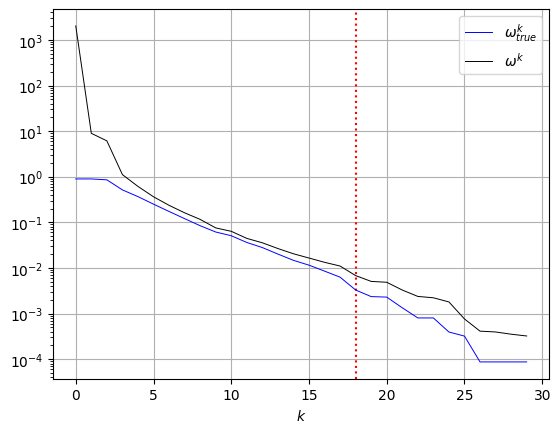

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)